In [2]:
import torch
print(torch.__version__)

1.2.0


In [63]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import keras
from keras.models import Model
from keras.layers import Input, LSTM, Dense
from keras.models import Sequential, Input, Model
from keras.layers import (Dense, Conv1D, Convolution2D, GRU, LSTM, Recurrent, Bidirectional, TimeDistributed,
                          Dropout, Flatten, RepeatVector, Reshape, MaxPooling1D, UpSampling1D, BatchNormalization)
from keras.layers.core import Lambda
from keras.optimizers import Adam
from keras.regularizers import l1
from keras.models import load_model
from sklearn import preprocessing
from keras.models import load_model
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import linear_model
import pandas as pd
import torch
import torch.nn as nn
import random
#from keras import layers as layers
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from scipy import special
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import tensorflow as tf
import tensorflow.keras.backend as K

In [34]:
def function_gen(x, a, b, c, d, e, f, z1, z2, z3, z4, z5, z6, z7, z8, z9, z10, z11, z12):
    y1 = a*(x-z1)**2 + b*(x-z2)**2 + c*(x-z3)**2 + d*(x-z4)**2 + e*(x-z5)**2 + f*(x-z6)**2
    y2 = a*(x+z7)**2 + b*(x+z8)**2 + c*(x+z9)**2 + d*(x+z10)**2+ e*(x+z11)**2+ f*(x+z12)**2
    return y1, y2

$y_1 = a(x-z_1)^2+b(x-z_2)^2+c(x-z_3)^2+d(x-z_4)^2+e(x-z_5)^2+f(x-z_6)^2$

$y_2 = a(x+z_7)^2+b(x+z_8)^2+c(x+z_9)^2+d(x+z_{10})^2+e(x+z_{11})^2+f(x+z_{12})^2$

In [35]:
x = np.linspace(-10,10,100)
y1 = []
y2 = []
a = []
b = []
c = []
d = []
e = []
f = []
z1 = np.random.uniform(0,12)
z2 = np.random.uniform(0,12)
z3 = np.random.uniform(0,12)
z4 = np.random.uniform(0,12)
z5 = np.random.uniform(0,12)
z6 = np.random.uniform(0,12)
z7 = np.random.uniform(0,12)
z8 = np.random.uniform(0,12)
z9 = np.random.uniform(0,12)
z10 = np.random.uniform(0,12)
z11 = np.random.uniform(0,12)
z12 = np.random.uniform(0,12)
    
for k in range(10000):
    a_ = np.random.normal(8, 1, 1)
    b_ = np.random.normal(7, 2, 1)
    c_ = np.random.normal(6, 3, 1)
    d_ = np.random.normal(5, 4, 1)
    e_ = np.random.normal(4, 5, 1)
    f_ = np.random.normal(3, 7, 1)
    y1_, y2_ = function_gen(x, a_, b_, c_, d_,e_,f_,z1,z2,z3,z4,z5,z6,z7,z8,z9,z10,z11,z12)
    y1.append(y1_)
    y2.append(y2_)
    a.append(a_)
    b.append(b_)
    c.append(c_)
    d.append(d_)
    e.append(e_)
    f.append(f_)
        
nor_y1 = preprocessing.normalize(y1)
nor_y2 = preprocessing.normalize(y2)

In [67]:
y1_3d = np.atleast_3d(nor_y1)
y2_3d = np.atleast_3d(nor_y2)

In [68]:
y1_3d = K.constant(y1_3d,np.float32)
y2_3d = K.constant(y2_3d,np.float32)

In [84]:
y1_3d

<tf.Tensor: id=21466, shape=(10000, 100, 1), dtype=float32, numpy=
array([[[0.25434208],
        [0.24732547],
        [0.24041069],
        ...,
        [0.04781488],
        [0.05067502],
        [0.05363698]],

       [[0.25603694],
        [0.24871929],
        [0.24151242],
        ...,
        [0.06205049],
        [0.0654792 ],
        [0.06901871]],

       [[0.245284  ],
        [0.23916022],
        [0.23311572],
        ...,
        [0.02044634],
        [0.02201359],
        [0.02366013]],

       ...,

       [[0.24788131],
        [0.2415059 ],
        [0.23521635],
        ...,
        [0.02917672],
        [0.03112859],
        [0.03316631]],

       [[0.25685525],
        [0.24949056],
        [0.24223731],
        ...,
        [0.06127677],
        [0.06472033],
        [0.0682753 ]],

       [[0.2503068 ],
        [0.2437068 ],
        [0.2371981 ],
        ...,
        [0.03523374],
        [0.03749055],
        [0.03983866]]], dtype=float32)>

In [2]:
def s_1(b1, b2, Vbot, C1, D1):
    s1 = (b1+b2)/2 + ((b2-b1)/2)*special.erfc((Vbot-C1)/D1)
    return s1
    
def s_2(b3, b4, Vbot, C2, D2):
    s2 = (b3+b4)/2 + ((b4-b3)/2)*special.erfc((Vbot-C2)/D2)
    return s2

def s_3(b5, b6, Vbot, C3, D3):
    s3 = (b5+b6)/2 + ((b6-b5)/2)*special.erfc((Vbot-C3)/D3)
    return s3

def s_4(b7, b8, Vtop, C4, D4):
    s4 = (b7+b8)/2 + ((b8-b7)/2)*special.erfc((Vtop-C4)/D4)
    return s4

def s_5(b9, b10, Vtop, C5, D5):
    s5 = (b9+b10)/2 + ((b10-b9)/2)*special.erfc((Vtop-C5)/D5)
    return s5

def s_6(b11, b12, Vtop, C6, D6):
    s6 = (b11+b12)/2 + ((b12-b11)/2)*special.erfc((Vtop-C6)/D6)
    return s6

In [3]:
def F_1(a1, a2, a3, a4, a7, Al1, Al2, Al3, s1, s2, s3, Vbot):
    F1 = a1+(a2-a1)*(special.erfc((Vbot+Al1)/s1)+1)/2 + (a3-a2)*(special.erfc((Vbot+Al2)/s2)+1)/2 + (a4-a3)*(special.erfc((Vbot+Al3)/s3)+1)/2 + a7*Vbot
    return F1

def F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop):
    F2 = a1+(a5-a1)*(special.erfc((Vtop+Au1)/s4)+1)/2 + (a6-a5)*(special.erfc((Vtop+Au2)/s5)+1)/2 + (a4-a6)*(special.erfc((Vtop+Au3)/s6)+1)/2 + a7*Vtop
    return F2
    
    
    

In [269]:
def s_1(b1, b2, Vbot, C1, D1):
    s1 = (b1+b2)/2 + ((b2-b1)/2)*special.erfc((Vbot-C1)/D1)
    return s1
    
def s_2(b3, b4, Vbot, C2, D2):
    s2 = (b3+b4)/2 + ((b4-b3)/2)*special.erfc((Vbot-C2)/D2)
    return s2

def s_3(b5, b6, Vbot, C3, D3):
    s3 = (b5+b6)/2 + ((b6-b5)/2)*special.erfc((Vbot-C3)/D3)
    return s3

def s_4(b7, b8, Vtop, C4, D4):
    s4 = (b7+b8)/2 + ((b8-b7)/2)*special.erfc((Vtop-C4)/D4)
    return s4

def s_5(b9, b10, Vtop, C5, D5):
    s5 = (b9+b10)/2 + ((b10-b9)/2)*special.erfc((Vtop-C5)/D5)
    return s5

def s_6(b11, b12, Vtop, C6, D6):
    s6 = (b11+b12)/2 + ((b12-b11)/2)*special.erfc((Vtop-C6)/D6)
    return s6

In [270]:
def F_1(a1, a2, a3, a4, a7,Al1, Al2, Al3, s1, s2, s3, Vbot):
    F1 = a1+(a1-a2)*(special.erfc((Vbot+Al1)/s1)+1)/2 + (a2-a3)*(special.erfc((Vbot+Al2)/s2)+1)/2 + (a3-a4)*(special.erfc((Vbot+Al3)/s3)+1)/2 + a7*Vtop
    return F1

def F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop):
    F2 = a1+(a1-a5)*(special.erfc((Vtop+Au1)/s4)+1)/2 + (a5-a6)*(special.erfc((Vtop+Au2)/s5)+1)/2 + (a6-a4)*(special.erfc((Vtop+Au3)/s6)+1)/2 + a7*Vtop
    return F2

In [315]:
Vbot = np.linspace(-15,15,200)
Vtop = np.linspace(-15,15,200)
a1 = -5
a2 = 3
a3 = 12
a4 = 15
a5 = 2
a6 = 11
a7 = 0.01
b1 = 1
b2 = 4
b3 = 1
b4 = 4
b5 = 1
b6 = 4
b7 = 1
b8 = 4
b9 = 1
b10= 4
b11= 1
b12= 4
Al1= 3
Al2= -2
Al3= -6
Au1= -8
Au2= -4
Au3= 0
C1 = -1
C2 = -1
C3 = -1
C4 = 6
C5 = 6
C6 = 6
D1 = 1
D2 = 1
D3 = 1
D4 = 1
D5 = 1
D6 = 1



In [316]:
s1 = s_1(b1, b2, Vbot, C1, D1)
s2 = s_2(b3, b4, Vbot, C2, D2)
s3 = s_3(b5, b6, Vbot, C3, D3)
s4 = s_4(b7, b8, Vtop, C4, D4)
s5 = s_5(b9, b10, Vtop, C5, D5)
s6 = s_6(b11, b12, Vtop, C6, D6)


In [317]:
F1 = F_1(a1, a2, a3, a4, a7, Al1, Al2, Al3, s1, s2, s3, Vbot)
F2 = F_2(a1, a5, a6, a4, a7, Au1, Au2, Au3, s4, s5, s6, Vtop)

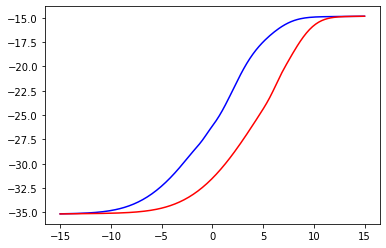

In [318]:
plt.plot(Vbot,F1,'b')
plt.plot(Vtop,F2,'r')

In [204]:
def s_1(b1, b2, Vdc, b7, b5):
    s1 = (b1+b2)/2 + ((b2-b1)/2)*special.erfc((Vdc-b7)/b5)
    return s1
    
def s_2(b3, b4, Vdc, b8, b6):
    s2 = (b3+b4)/2 + ((b4-b3)/2)*special.erfc((Vdc-b8)/b6)
    return s2

def F_1(a1, a2, a3, Vdc, Ec_, s1):
    F1 = (a1+a2)/2 + (a2-a1)*special.erfc((Vdc-Ec_)/s1) + a3*Vdc
    return F1

def F_2(a1, a2, a3, Vdc, Ec, s2):
    F2 = (a1+a2)/2 + (a2-a1)*special.erfc((Vdc-Ec)/s2) + a3*Vdc
    return F2
    

In [265]:
b1 = 1
b2 = 2.2
b3 = 1
b4 = 3.5
b5 = 5
b6 = 5
b7 = 5
b8 = 5
Vdc = np.linspace(-10,10,100)
Ec_ = -5
Ec = 5
a1 = 1
a2 = 0
a3 = 0.01

In [266]:
s1 = s_1(b1, b2, Vdc, b7, b5)
s2 = s_2(b3, b4, Vdc, b8, b6)

In [267]:
F1 = F_1(a1, a2, a3, Vdc, Ec_, s1)
F2 = F_2(a1, a2, a3, Vdc, Ec, s2)

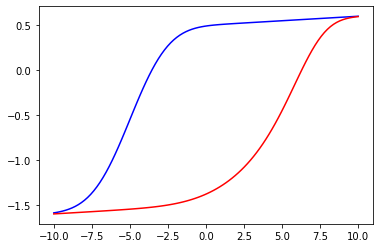

In [268]:
plt.plot(Vdc,F1,'b')
plt.plot(Vdc,F2,'r')

In [80]:
TIME_STEP = 100
INPUT_SIZE = 1
LR = 0.003

In [39]:
x = np.linspace(0,1,100,dtype = np.float32)

In [40]:
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)
y_np = np.cos(steps)

In [41]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN,self).__init__()
        
        self.rnn = nn.RNN(
            input_size = INPUT_SIZE,
            hidden_size = 32,
            num_layers = 1,
            batch_first = True,   
        )
        
        self.out = nn.Linear(32,1)

    def forward(self, x, h_state):
        r_out, h_state = self.rnn(x, h_state)
        outs = []
        for time_step in range(r_out.size(1)):
            outs.append(self.out(r_out[:,time_step,:]))
        return torch.stack(outs, dim=1), h_state
    

In [42]:
rnn = RNN()
rnn

RNN(
  (rnn): RNN(1, 32, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)

In [43]:
optimizer = torch.optim.Adam(rnn.parameters(),lr=LR)
loss_func = nn.MSELoss()

In [44]:
h_state = None

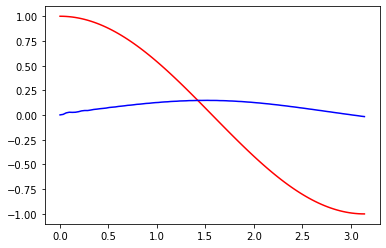

Epoch: 0............. Loss: 0.5026


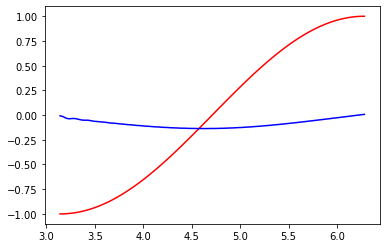

Epoch: 1............. Loss: 0.5006


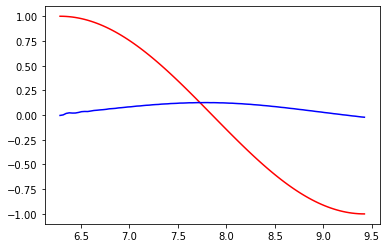

Epoch: 2............. Loss: 0.4983


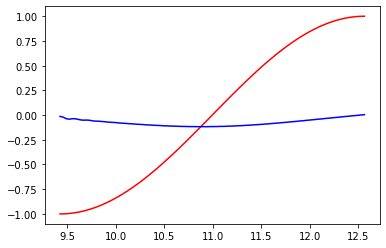

Epoch: 3............. Loss: 0.4969


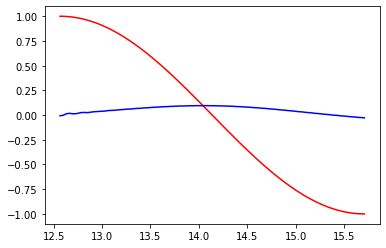

Epoch: 4............. Loss: 0.4935


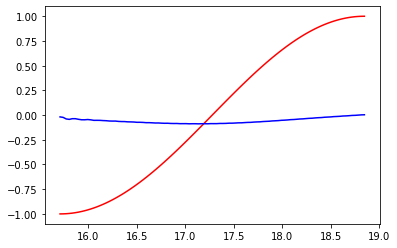

Epoch: 5............. Loss: 0.4920


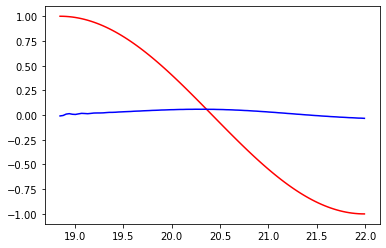

Epoch: 6............. Loss: 0.4889


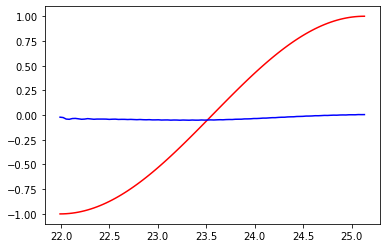

Epoch: 7............. Loss: 0.4869


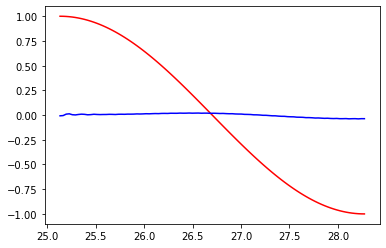

Epoch: 8............. Loss: 0.4852


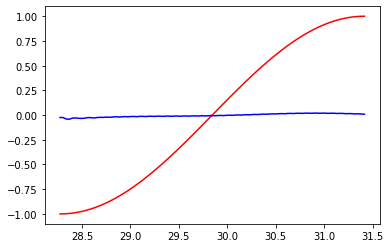

Epoch: 9............. Loss: 0.4826


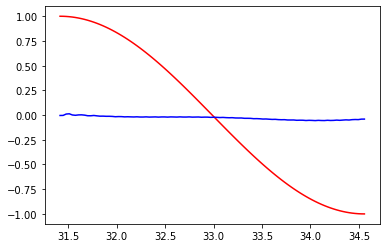

Epoch: 10............. Loss: 0.4825


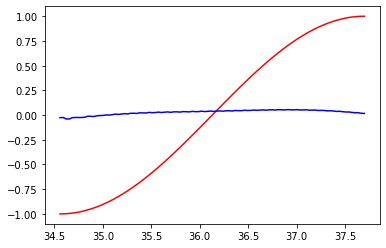

Epoch: 11............. Loss: 0.4796


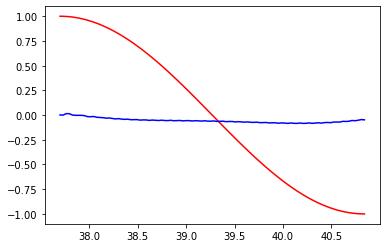

Epoch: 12............. Loss: 0.4806


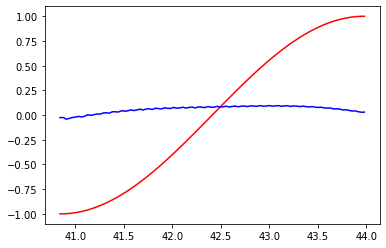

Epoch: 13............. Loss: 0.4779


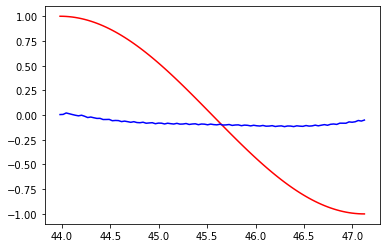

Epoch: 14............. Loss: 0.4790


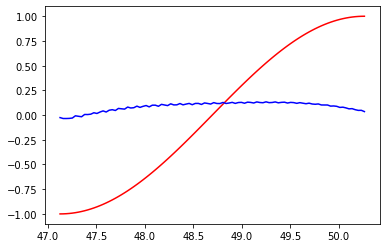

Epoch: 15............. Loss: 0.4767


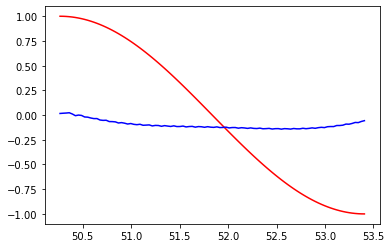

Epoch: 16............. Loss: 0.4766


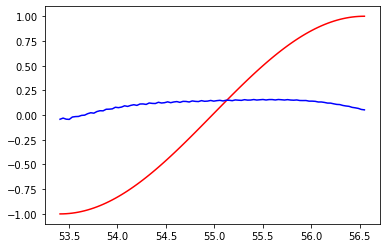

Epoch: 17............. Loss: 0.4744


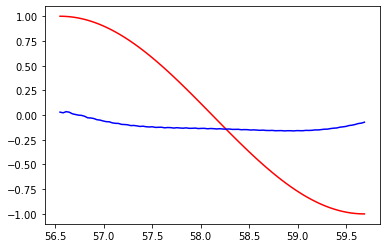

Epoch: 18............. Loss: 0.4724


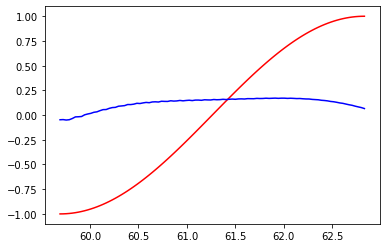

Epoch: 19............. Loss: 0.4691


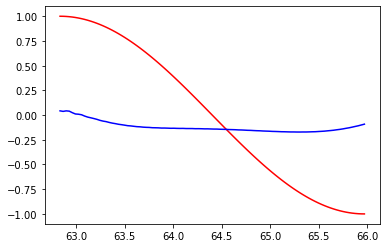

Epoch: 20............. Loss: 0.4651


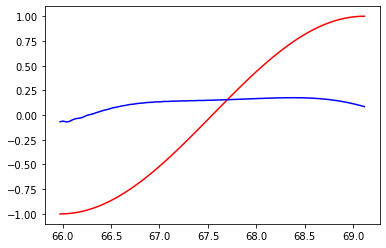

Epoch: 21............. Loss: 0.4584


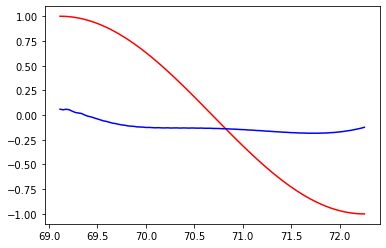

Epoch: 22............. Loss: 0.4533


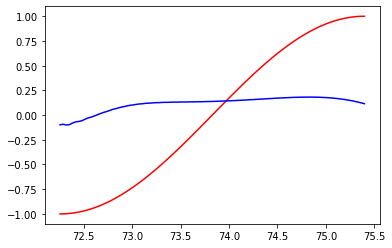

Epoch: 23............. Loss: 0.4394


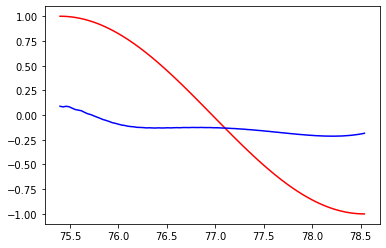

Epoch: 24............. Loss: 0.4331


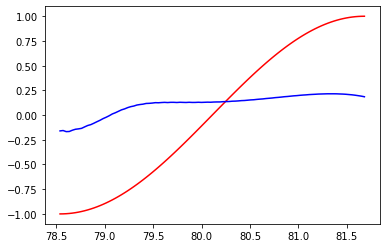

Epoch: 25............. Loss: 0.3985


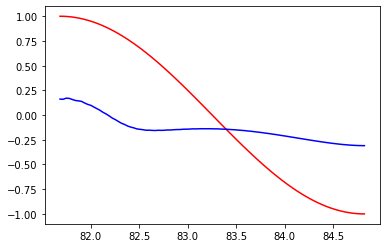

Epoch: 26............. Loss: 0.3837


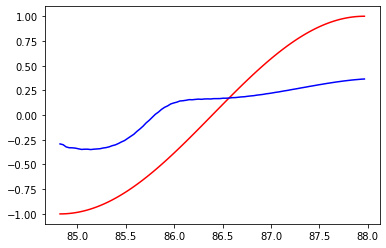

Epoch: 27............. Loss: 0.2463


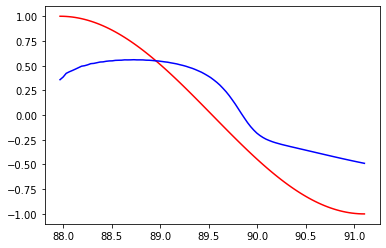

Epoch: 28............. Loss: 0.1443


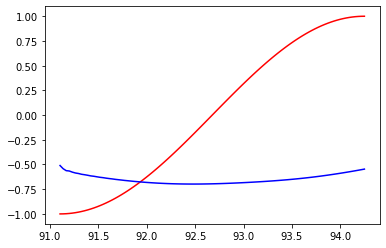

Epoch: 29............. Loss: 0.9184


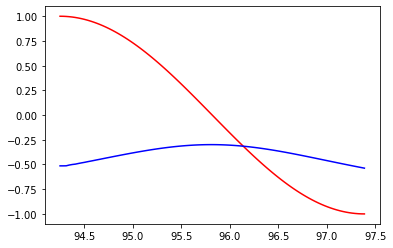

Epoch: 30............. Loss: 0.6593


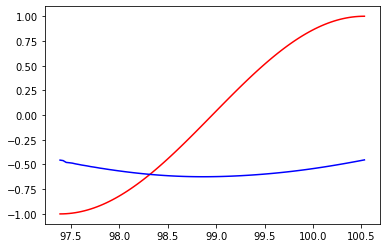

Epoch: 31............. Loss: 0.8203


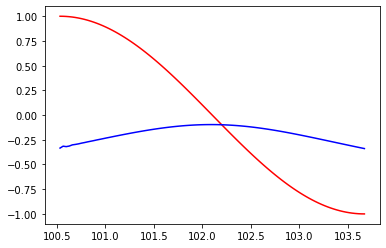

Epoch: 32............. Loss: 0.5427


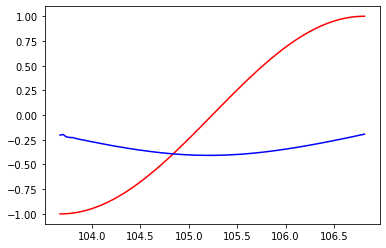

Epoch: 33............. Loss: 0.6124


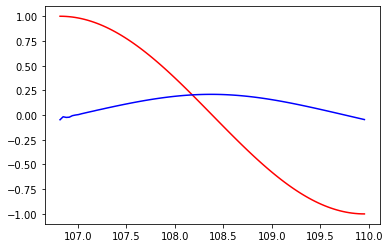

Epoch: 34............. Loss: 0.5199


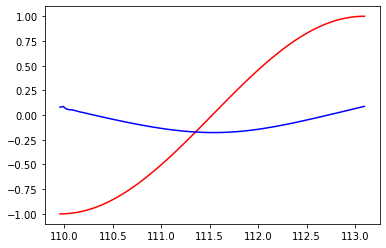

Epoch: 35............. Loss: 0.5152


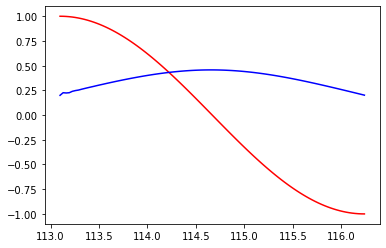

Epoch: 36............. Loss: 0.6381


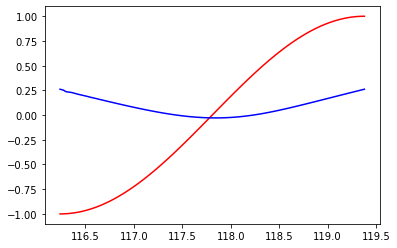

Epoch: 37............. Loss: 0.5212


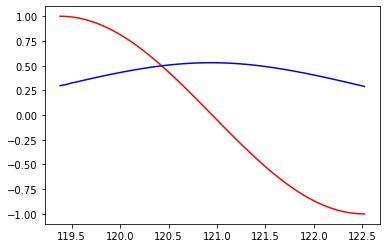

Epoch: 38............. Loss: 0.7013


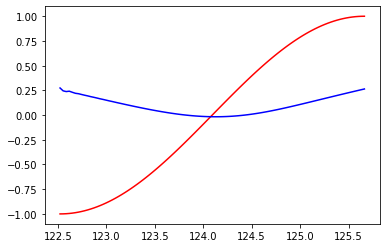

Epoch: 39............. Loss: 0.5225


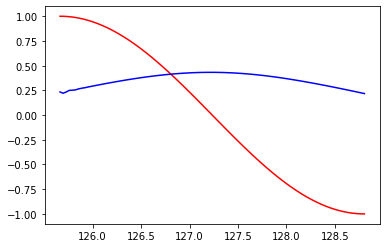

Epoch: 40............. Loss: 0.6304


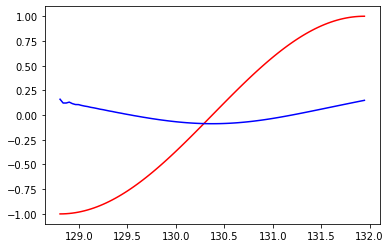

Epoch: 41............. Loss: 0.5076


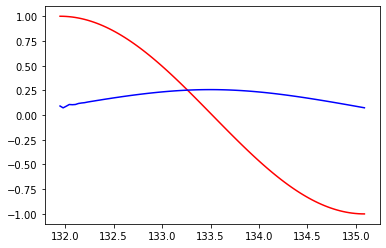

Epoch: 42............. Loss: 0.5400


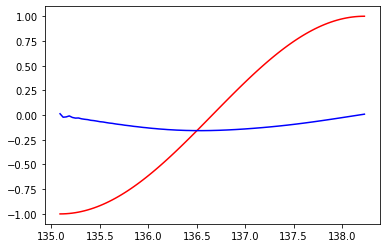

Epoch: 43............. Loss: 0.5080


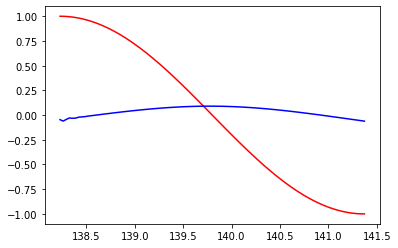

Epoch: 44............. Loss: 0.5031


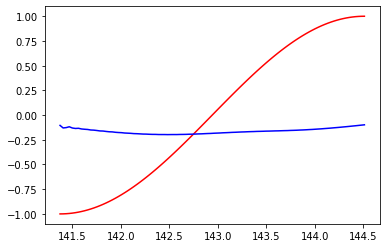

Epoch: 45............. Loss: 0.5162


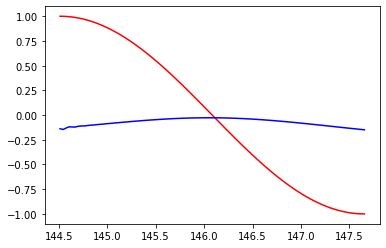

Epoch: 46............. Loss: 0.5052


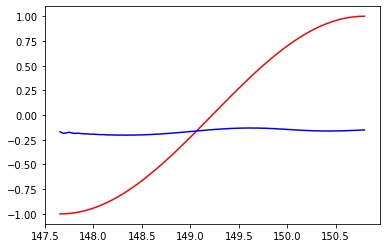

Epoch: 47............. Loss: 0.5073


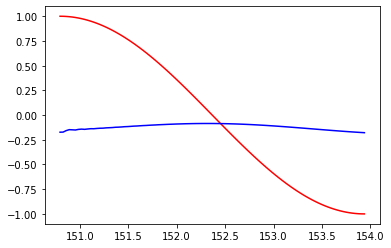

Epoch: 48............. Loss: 0.5121


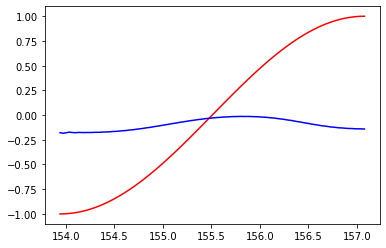

Epoch: 49............. Loss: 0.4759


In [81]:
for step in range(50):
    optimizer.zero_grad()
    start, end = step*np.pi, (step+1)*np.pi
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)
    y_np = np.cos(steps)
    
    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))
    
    prediction, h_state = rnn(x, h_state)
    h_state = Variable(h_state.data)
    
    loss = loss_func(prediction, y)
    
    loss.backward()
    optimizer.step()
    
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(),'b-')
    plt.draw(); plt.pause(0.05)
    print('Epoch: {}.............'.format(step), end=' ')
    print("Loss: {:.4f}".format(loss.item()))


In [52]:
def identity_block(X, f, filters, stage, block):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    F1, F2, F3 = filters
    X_shortcut = X
    X = Conv2D(filters = F1, kernel_size = (1,1), strides = (1,1), padding = 'vaild', name = conv_name_base + '2a', 
        kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', 
        kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), padding = 'vaild', name = conv_name_base + '2c', 
        kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)
    
    return X

In [54]:
def convolutional_block(X, f , filters, stage, block, s = 2):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    F1, F2, F3 = filters
    X_shortcut = X
    
    X = Conv2D(filters = F1, kernel_size = (1,1), strides = (s,s), padding = 'vaild', name = conv_name_base + '2a', 
        kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2a')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = F2, kernel_size = (f,f), strides = (1,1), padding = 'same', name = conv_name_base + '2b', 
        kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(filters = F3, kernel_size = (1,1), strides = (1,1), padding = 'vaild', name = conv_name_base + '2c', 
        kernel_initializer = glorot_uniform(seed = 0))(X)
    X = BatchNormalization(axis = 3, name = bn_name_base + '2c')(X)
    
    X_shortcut = Conv2D(filters = F3, kernel_size = (1,1), strides = (s,s), padding = 'valid', 
                 name = conv_name_base + '1', kernel_initializer = glorot_uniform(seed=0))(X_shortcut)
    X_shortcut = BatchNormalization(axis = 3, name = bn_name_base + '1')(X_shortcut)
    
    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

In [55]:
# def ResNet50(input_shape = (64, 64, 3), classes = 6):
    
#     # Define the input as a tensor with shape input_shape
#     X_input = Input(input_shape)

    
#     # Zero-Padding
#     X = ZeroPadding2D((3, 3))(X_input)
    
#     # Stage 1
#     X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
#     X = Activation('relu')(X)
#     X = MaxPooling2D((3, 3), strides=(2, 2))(X)

#     # Stage 2
#     X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
#     X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
#     X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')

#     # Stage 3
#     X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
#     X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
#     X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
#     X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

#     # Stage 4
#     X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

#     # Stage 5
#     X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
#     X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
#     X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

#     # AVGPOOL
#     X = AveragePooling2D(pool_size=(2,2), padding='same')(X)

#     # Output layer
#     X = Flatten()(X)
#     X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
#     # Create model
#     model = Model(inputs = X_input, outputs = X, name='ResNet50')

#     return model

In [66]:
np.atleast_3d(nor_y1).shape

(10000, 100, 1)

In [74]:
np.ones((1, 6, 2, 3))

array([[[[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.]]]])

In [49]:
def encode_identity_block(X, stage, block, size, n_step, drop_frac):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    X_shortcut = X
    X = layers.Bidirectional(LSTM(size, return_sequences=True, dropout=drop_frac),
                            input_shape=(n_step, 1))(X)
    
    X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True,  dropout=drop_frac),
                            input_shape=(n_step, 1))(X)
    
    X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True,  dropout=drop_frac),
                            input_shape=(n_step, 1))(X)
    
    X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)
    
    X = layers.add([X, X_shortcut])
    X = layers.Activation('relu')(X)
    
    return X

In [50]:
def decode_identity_block(X, stage, block, size, n_step, drop_frac):
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    
    X_shortcut = X
    X = layers.Bidirectional(LSTM(size, return_sequences=True,  dropout=drop_frac),
                            input_shape=(n_step, 1))(X)
    
    X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2a')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True,  dropout=drop_frac),
                            input_shape=(n_step, 1))(X)
    
    X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2b')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.Bidirectional(LSTM(size, return_sequences=True,  dropout=drop_frac),
                            input_shape=(n_step, 1))(X)
    
    X = layers.BatchNormalization(axis = 1, name = bn_name_base + '2c')(X)
    
    X = layers.add([X, X_shortcut])
    X = layers.Activation('relu')(X)
    
    return X

In [106]:
def ResNet50(Outside_input,lr,size=128,drop_frac=0,n_step=100):
#     global backend, layers, models, keras_utils
#     backend, layers, models, keras_utils = get_submodules_from_kwargs(kwargs)
    
    # Define the input as a tensor with shape input_shape
#     X_input = Input(input_shape)
    X_input = layers.Input(tensor=Outside_input)
    X = X_input
    
#     # Zero-Padding
#     X = ZeroPadding2D((3, 3))(X_input)
    
#     # Stage 1
#     X = Conv2D(64, (7, 7), strides = (2, 2), name = 'conv1', kernel_initializer = glorot_uniform(seed=0))(X)
#     X = BatchNormalization(axis = 3, name = 'bn_conv1')(X)
#     X = Activation('relu')(X)
#     X = MaxPooling2D((3, 3), strides=(2, 2))(X)

#     # Stage 2
#     X = convolutional_block(X, f = 3, filters = [64, 64, 256], stage = 2, block='a', s = 1)
    X = encode_identity_block(X,2,'b',128,100,0)
    X = layers.Bidirectional(LSTM(size, return_sequences=False,  dropout=drop_frac),
                            input_shape=(n_step, 1))(X)
    X = layers.BatchNormalization(axis = 1, name = 'last_encode')(X)
    X = layers.Activation('relu')(X)
    
    X = layers.RepeatVector(n_step)(X)
    
    X = decode_identity_block(X,2,'c',128,100,0)
    X = layers.TimeDistributed(Dense(1, activation='linear'))(X)
#     # Stage 3
#     X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
#     X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
#     X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
#     X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')

#     # Stage 4
#     X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
#     X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

#     # Stage 5
#     X = convolutional_block(X, f=3, filters=[512, 512, 2048], stage=5, block='a', s=2)
#     X = identity_block(X, 3, [512, 512, 2048], stage=5, block='b')
#     X = identity_block(X, 3, [512, 512, 2048], stage=5, block='c')

    # AVGPOOL
#     X = AveragePooling2D(pool_size=(2,2), padding='same')(X)

#     # Output layer
#     X = Flatten()(X)
#     X = Dense(classes, activation='softmax', name='fc' + str(classes), kernel_initializer = glorot_uniform(seed=0))(X)
    
    
    # Create model
    model = Model(inputs = X_input, outputs = X, name='ResNet50')

    return model

In [107]:
Try = ResNet50(y1_3d,3e-5)

In [108]:
Try.summary()

Model: "ResNet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (10000, 100, 1)      0                                            
__________________________________________________________________________________________________
bidirectional_99 (Bidirectional (10000, 100, 256)    133120      input_7[0][0]                    
__________________________________________________________________________________________________
bn2b_branch2a (BatchNormalizati (10000, 100, 256)    400         bidirectional_99[0][0]           
__________________________________________________________________________________________________
activation_93 (Activation)      (10000, 100, 256)    0           bn2b_branch2a[0][0]              
___________________________________________________________________________________________

In [110]:
Try.compile(Adam(3e-5), loss='mse')

In [ ]:
model1 = Try.fit(y = y2_3d,epochs=10,steps_per_epoch = 128)

Epoch 1/10
